(Strozzi, Salviati) -> 0.00000000
(Strozzi, Barbadori) -> 0.16666667
(Strozzi, Tornabuoni) -> 0.12500000
(Strozzi, Medici) -> 0.44444444
(Strozzi, Guadagni) -> 0.20000000
(Strozzi, Ginori) -> 0.00000000
(Strozzi, Acciaiuoli) -> 0.10000000
(Strozzi, Pazzi) -> 0.09090909
(Strozzi, Lamberteschi) -> 0.08333333
(Strozzi, Albizzi) -> 0.23076923
(Barbadori, Salviati) -> 0.50000000
(Barbadori, Tornabuoni) -> 0.33333333
(Barbadori, Guadagni) -> 0.25000000
(Barbadori, Peruzzi) -> 0.28571429
(Barbadori, Ginori) -> 0.12500000
(Barbadori, Bischeri) -> 0.37500000
(Barbadori, Acciaiuoli) -> 0.22222222
(Barbadori, Pazzi) -> 0.20000000
(Barbadori, Ridolfi) -> 0.27272727
(Barbadori, Lamberteschi) -> 0.16666667
(Barbadori, Albizzi) -> 0.30769231
(Tornabuoni, Salviati) -> 0.50000000
(Tornabuoni, Ginori) -> 0.28571429
(Tornabuoni, Peruzzi) -> 0.22222222
(Tornabuoni, Bischeri) -> 0.50000000
(Tornabuoni, Acciaiuoli) -> 0.33333333
(Tornabuoni, Castellani) -> 0.30000000
(Tornabuoni, Pazzi) -> 0.27272727
(Torna

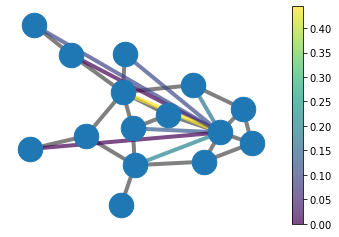

In [114]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import bipartite
from networkx.generators.random_graphs import erdos_renyi_graph
import copy


# -- Initialize graphs
seed = 30
G = nx.florentine_families_graph()
nodes = G.nodes()

layout = nx.spring_layout(G, seed=seed)

# -- compute jaccard's similarity
"""
    This example is using NetwrokX's native implementation to compute similarities.
    Write a code to compute Jaccard's similarity and replace with this function.
"""
pred = nx.jaccard_coefficient(G)


# -- keep a copy of edges in the graph
old_edges = copy.deepcopy(G.edges())

# -- add new edges representing similarities.
new_edges, metric = [], []
for u, v, p in pred:
    G.add_edge(u, v)
    print(f"({u}, {v}) -> {p:.8f}")
    new_edges.append((u, v))
    metric.append(p)

# -- plot Florentine Families graph
nx.draw_networkx_nodes(G, nodelist=nodes, label=nodes, pos=layout, node_size=600)
nx.draw_networkx_edges(G, edgelist=old_edges, pos=layout, edge_color='gray', width=4)

# -- plot edges representing similarity
"""
    This example is randomly plotting similarities between 8 pairs of nodes in the graph. 
    Identify the ”Ginori”
"""
ne = nx.draw_networkx_edges(G, edgelist=new_edges[:8], pos=layout, edge_color=np.asarray(metric[:8]), width=4, alpha=0.7)
plt.colorbar(ne)
plt.axis('off')
plt.show()

In [100]:
def Jaccard_Similarity(G):
    JSM = np.zeros([len(list(G.nodes())),len(list(G.nodes()))])
    for ni,i in enumerate(list(G.nodes())):
        n_i = []
        for nj, j in enumerate(list(G.nodes())):
            n_j = []
            for edge in list(G.edges()):
                if i == edge[0]:
                    n_i.append(edge[1])
                elif i == edge[1]:
                    n_i.append(edge[0]) 
                if j == edge[0]:
                    n_j.append(edge[1])
                elif j == edge[1]:
                    n_j.append(edge[0])

            n_i_set = set(n_i)
            n_j_set = set(n_j)
            if len(n_i_set.union(n_j_set)) != 0:
                JSM[ni,nj] += len(n_i_set.intersection(n_j_set))/len(n_i_set.union(n_j_set))

    return JSM

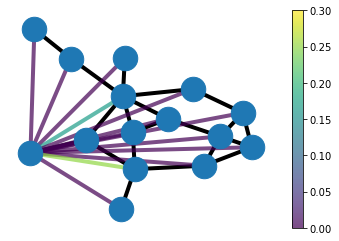

In [128]:
# -- Initialize graphs
seed = 30
G = nx.florentine_families_graph()
nodes = G.nodes()

layout = nx.spring_layout(G, seed=seed)

# -- compute jaccard's similarity
"""
    This example is using NetwrokX's native implementation to compute similarities.
    Write a code to compute Jaccard's similarity and replace with this function.
"""


old_edges = copy.deepcopy(G.edges())


JSM = Jaccard_Similarity(G)

# create list of all Ginori family pairs
G_edges = []
for i in list(G.nodes()):
    G_edges.append(('Ginori',i))

# extract Jaccard similarity fo Ginori family
G_JS = JSM[13]


# -- plot Florentine Families graph
nx.draw_networkx_nodes(G, nodelist=nodes, label=nodes, pos=layout, node_size=600)
nx.draw_networkx_edges(G, edgelist=old_edges, pos=layout, edge_color='black', width=4)

ne = nx.draw_networkx_edges(G, edgelist=G_edges, pos=layout, edge_color=np.asarray(G_JS), width=4, alpha=0.7,edge_vmin=0, edge_vmax=0.3,)

plt.colorbar(ne)
plt.axis('off')
plt.show()

In [124]:
ne